In [68]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col="Unnamed: 0")

In [4]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    display(x)
    pd.reset_option('display.max_rows')

In [7]:
df.shape

(34545, 255)

In [6]:
#Function to return the names of missing values based on a percentage answered.
def the_nans(dataframe, fill_perc):
    the_nans=[]
    threshold = dataframe.shape[0] * fill_perc / 100
    for column in dataframe.columns:
        if dataframe[column].isna().sum() >= dataframe[column].size - threshold:
            the_nans.append(column)
    return the_nans
#Saves the values of the dropped all nan columns into a variable and drops them out of the dataframe
removed_nans = the_nans(df, 0)
df.drop(columns=removed_nans, inplace=True)

#Standardizes Interview Date and drops redundant columns
df["IDATE"] = df["IDATE"].map(lambda x: f"{str(x)[0:1]}-{str(x)[1:3]}-{str(x)[3:7]}"  if len(str(x)) == 7 else f"{str(x)[0:2]}-{str(x)[2:4]}-{str(x)[4:8]}")
df["IDATE"] = pd.to_datetime(df["IDATE"], format='%m-%d-%Y')
df.drop(columns=["IDAY", 'IMONTH', 'IYEAR'], inplace=True)

In [8]:
#Data is already just those states.
df["_STATE"].unique()

array([ 9., 34., 36.])

In [9]:
#Numcodes for zero in Physhealth reconciled
df['PHYSHLTH'].replace({88:0}, inplace=True)

In [10]:
#Creates new categories to delete the dropped values.
pys_dropped_df = df.drop(df.loc[(df["PHYSHLTH"] == 99) | (df["PHYSHLTH"] == 77)].index)
pys_megadropped_df = df.drop(df.loc[(df["PHYSHLTH"] == 99) | (df["PHYSHLTH"] == 77) | (df["PHYSHLTH"] == 0)].index)


In [20]:
# pys_dropped_df['PHYSHLTH'].describe()
# pys_dropped_df['PHYSHLTH'].index

# type(pys_dropped_df["PHYSHLTH"])
# type(np.nan)

Int64Index([ 49938,  49939,  49940,  49941,  49942,  49943,  49944,  49945,
             49946,  49947,
            ...
            303769, 303770, 303771, 303772, 303773, 303774, 303775, 303776,
            303777, 303778],
           dtype='int64', length=33747)

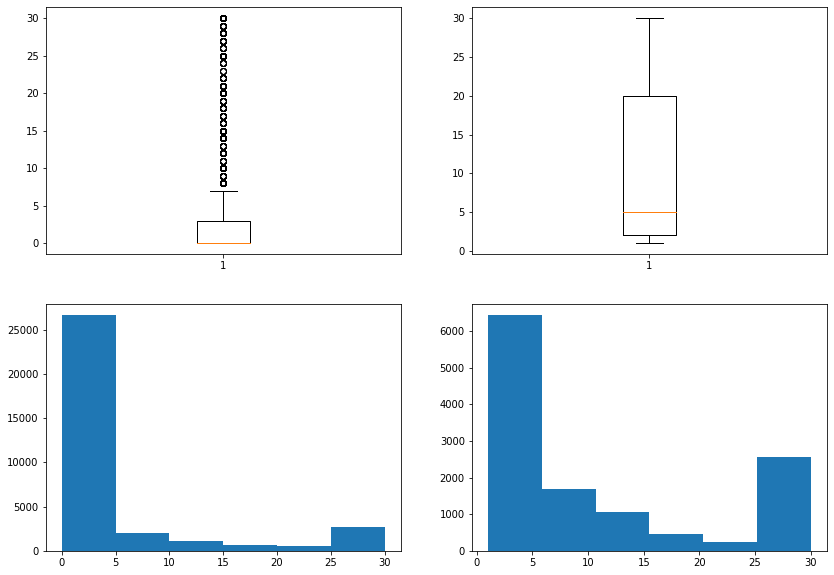

In [11]:
agg_fig = plt.figure(figsize=(14,10))
agg_ax1 = agg_fig.add_subplot(2,2,1)
agg_ax2 = agg_fig.add_subplot(2,2,2)
agg_ax3 = agg_fig.add_subplot(2,2,3)
agg_ax4 = agg_fig.add_subplot(2,2,4)
agg_ax1.boxplot(pys_dropped_df["PHYSHLTH"])
agg_ax2.boxplot(pys_megadropped_df["PHYSHLTH"])
agg_ax3.hist(pys_dropped_df["PHYSHLTH"], bins=6)
agg_ax4.hist(pys_megadropped_df["PHYSHLTH"], bins=6)
plt.show()

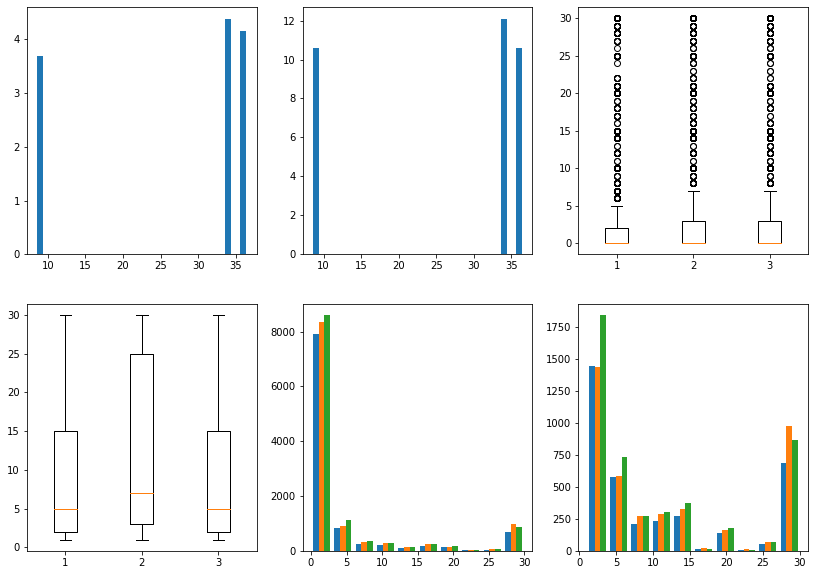

In [66]:
#Matches states with it's key
def return_state_key(key):
    state_legend = {9: "Connecticut", 34: "New Jersey", 36: "New York"}
    return legend[key]
def state_divide(frame, key, val_list, show):
    func = lambda x: frame[show].loc[(frame[key] == x)]
    return [func(val) for val in val_list]
    
pys_dropped_df.groupby('_STATE')['PHYSHLTH'].mean()
state_fig = plt.figure(figsize=(14,10))
state_ax1 = state_fig.add_subplot(2,3,1)
state_ax2 = state_fig.add_subplot(2,3,2)
state_ax3 = state_fig.add_subplot(2,3,3)
state_ax4 = state_fig.add_subplot(2,3,4)
state_ax5 = state_fig.add_subplot(2,3,5)
state_ax6 = state_fig.add_subplot(2,3,6)
state_ax1.bar(pys_dropped_df.groupby('_STATE').mean().index, pys_dropped_df.groupby('_STATE').mean()['PHYSHLTH'])
state_ax2.bar(pys_megadropped_df.groupby('_STATE').mean().index, pys_megadropped_df.groupby('_STATE').mean()['PHYSHLTH'])
state_ax3.boxplot(state_divide(pys_dropped_df, "_STATE", [9,34,36], "PHYSHLTH"))
state_ax4.boxplot(state_divide(pys_megadropped_df, "_STATE", [9,34,36], "PHYSHLTH"))
state_ax5.hist(state_divide(pys_dropped_df, "_STATE", [9,34,36], "PHYSHLTH"))
state_ax6.hist(state_divide(pys_megadropped_df, "_STATE", [9,34,36], "PHYSHLTH"))
plt.show()


In [63]:
pys_dropped_df.groupby('_STATE').mean().index

Float64Index([9.0, 34.0, 36.0], dtype='float64', name='_STATE')

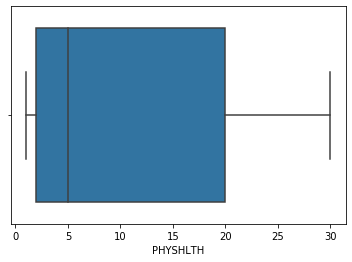

In [70]:
sns.boxplot(pys_megadropped_df["PHYSHLTH"])
sns.boxplot(pys_megadropped_df["PHYSHLTH"])

# pys_dropped_df["PHYSHLTH"].cou
# pys_dropped_df.iloc[:,0:15].info()
# pys_dropped_df["PHYSHLTH"]

In [32]:
df["PHYSHLTH"].value_counts(dropna=False)

0.0     21296
30.0     2438
2.0      1993
1.0      1538
3.0      1187
5.0      1092
10.0      751
7.0       641
15.0      640
4.0       622
77.0      493
20.0      402
14.0      326
99.0      305
6.0       187
25.0      159
8.0        99
21.0       70
12.0       69
28.0       57
29.0       35
27.0       22
18.0       19
16.0       16
17.0       15
9.0        15
22.0       12
13.0       10
19.0       10
11.0        8
24.0        7
26.0        7
23.0        4
Name: PHYSHLTH, dtype: int64

In [40]:
pys_megadropped_df["PHYSHLTH"].describe()

count    12451.000000
mean        11.072846
std         10.911940
min          1.000000
25%          2.000000
50%          5.000000
75%         20.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

In [73]:
df["_STATE"].unique()

array([ 9., 34., 36.])

In [86]:
type(df) == pd.core.frame.DataFrame

True

TypeError: '(['PHYSHLTH'], ['_STATE'])' is an invalid key